## End-to-End Loan Defaulter Prediction Using Machine Learning

Business Context
Financial institutions face significant losses due to loan defaults. The goal of this project is to build a machine learning model that can predict whether a loan applicant will default (class 1) or not (class 0) based on historical customer and loan attributes.

Why this matters

A false negative (predicting non-default when the customer actually defaults) leads to direct financial loss.

A false positive (predicting default when the customer would have paid) may lead to lost business.

 Therefore, this problem prioritizes Recall for the positive (default) class, while maintaining reasonable precision.

## Importing Required Liabraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score,precision_recall_curve,roc_curve,roc_auc_score,average_precision_score

## Load The Dataset

In [2]:
df=pd.read_csv("C:\\Users\\Sunil\\OneDrive\\Desktop\\loan_data_2007_2014.csv")
df.head(5)

C:\Users\Sunil\AppData\Local\Temp\ipykernel_17056\758653878.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\Sunil\\OneDrive\\Desktop\\loan_data_2007_2014.csv")


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

### Basic Info About Dataset

In [3]:
df.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
107923      107923   6529363    8081402       1500         1500   
262387      262387  32419751   35033067      35000        35000   
4809          4809    997047    1217775       5300         5300   
167210      167210   3296461    4068876      11825        11825   
91999        91999   7052374    8713961      18000        18000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
107923           1500.0   36 months     20.31        55.99     D  ...   
262387          35000.0   36 months     12.99      1179.12     C  ...   
4809             5300.0   36 months     19.91       196.73     E  ...   
167210          11825.0   36 months     11.14       387.92     B  ...   
91999           18000.0   60 months     15.22       430.31     C  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
107923          NaN     NaN         NaN         NaN         NaN      NaN   
262387          NaN     NaN         NaN         NaN         NaN      NaN   
4809            NaN     NaN         NaN         NaN         NaN      NaN   
167210          NaN     NaN         NaN         NaN         NaN      NaN   
91999           NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
107923          19700.0    NaN         NaN          NaN  
262387          54500.0    NaN         NaN          NaN  
4809                NaN    NaN         NaN          NaN  
167210          31800.0    NaN         NaN          NaN  
91999           17500.0    NaN         NaN          NaN  

[5 rows x 75 columns]

In [4]:
df.shape

(466285, 75)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
df.describe().T

count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq

In [9]:
df.describe(include='object').T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125981  124435   
purpose              466285      14   
title                466264   63098   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

In [10]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124435
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

In [13]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

## Dataset Overview

The dataset contains 466,285 records and 75 features, representing customer and loan-related financial information with many missing values across multiple columns. The target variable loan_status includes several business-driven categories such as Fully Paid, Charged Off, Default, Late, In Grace Period, and Does not meet credit policy, making preprocessing and label engineering essential before modeling.

### Data Cleaning

In [14]:
### Remove columns having 70% or more missing values,

df=df.drop(columns=df.columns[df.isnull().sum() >200000])

In [15]:
df.shape

(466285, 53)

In [16]:
### Remove target columns Current & In Grace Period values data cause we dont know the output

df=df[df['loan_status'] != 'Current']
df=df[df['loan_status'] != 'In Grace Period']

In [17]:
df.shape

(238913, 53)

In [18]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [19]:
df.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
5           5  1075269    1311441       5000         5000           5000.0   

         term  int_rate  installment grade  ... last_pymnt_d last_pymnt_amnt  \
0   36 months     10.65       162.87     B  ...       Jan-15          171.62   
1   60 months     15.27        59.83     C  ...       Apr-13          119.66   
2   36 months     15.96        84.33     C  ...       Jun-14          649.91   
3   36 months     13.49       339.31     C  ...       Jan-15          357.48   
5   36 months      7.90       156.46     A  ...       Jan-15          161.03   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             Jan-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             Jan-16                        0.0            1       INDIVIDUAL   
3             Jan-15                        0.0            1       INDIVIDUAL   
5             Sep-15                        0.0            1       INDIVIDUAL   

  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim  
0            0.0          NaN         NaN              NaN  
1            0.0          NaN         NaN              NaN  
2            0.0          NaN         NaN              NaN  
3            0.0          NaN         NaN              NaN  
5            0.0          NaN         NaN              NaN  

[5 rows x 53 columns]

In [20]:
pd.set_option('display.max_columns',None)

In [21]:
df.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
5           5  1075269    1311441       5000         5000           5000.0   

         term  int_rate  installment grade sub_grade             emp_title  \
0   36 months     10.65       162.87     B        B2                   NaN   
1   60 months     15.27        59.83     C        C4                 Ryder   
2   36 months     15.96        84.33     C        C5                   NaN   
3   36 months     13.49       339.31     C        C1   AIR RESOURCES BOARD   
5   36 months      7.90       156.46     A        A4  Veolia Transportaton   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-11   
1   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2  10+ years           RENT     12252.0        Not Verified  Dec-11   
3  10+ years           RENT     49200.0     Source Verified  Dec-11   
5    3 years           RENT     36000.0     Source Verified  Dec-11   

   loan_status pymnt_plan                                                url  \
0   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
1  Charged Off          n  https://www.lendingclub.com/browse/loanDetail....   
2   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
3   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
5   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   

          purpose                                  title zip_code addr_state  \
0     credit_card                               Computer    860xx         AZ   
1             car                                   bike    309xx         GA   
2  small_business                   real estate business    606xx         IL   
3           other                               personel    917xx         CA   
5         wedding  My wedding loan I promise to pay back    852xx         AZ   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65          0.0           Jan-85             1.0       3.0      0.0   
1   1.00          0.0           Apr-99             5.0       3.0      0.0   
2   8.72          0.0           Nov-01             2.0       2.0      0.0   
3  20.00          0.0           Feb-96             1.0      10.0      0.0   
5  11.20          0.0           Nov-04             3.0       9.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
5       7963        28.3       12.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5861.071414          5831.78          5000.00   
1            0.0   1008.710000          1008.71           456.46   
2            0.0   3003.653644          3003.65          2400.00   
3            0.0  12226.302210         12226.30         10000.00   
5            0.0   5631.377753          5631.38          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00  

## Find Hidden Pattern Through EDA

In [22]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

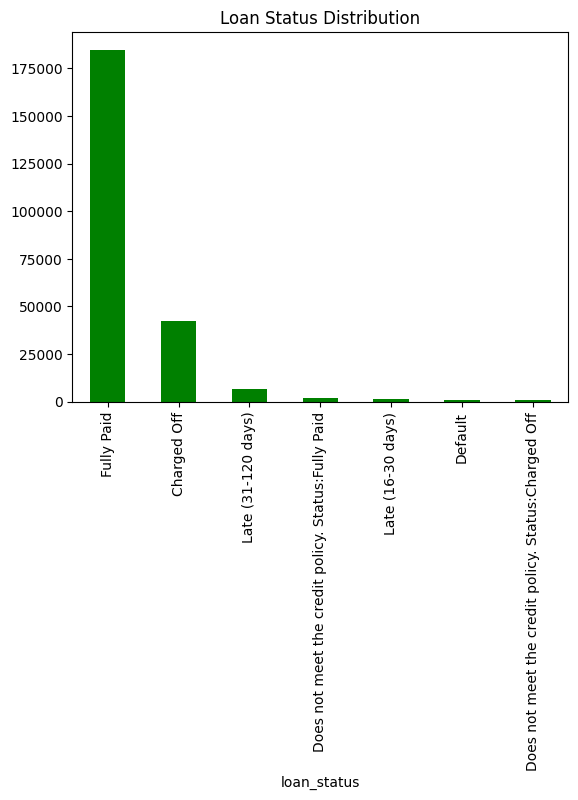

In [23]:
### Find target variable Distribution

df['loan_status'].value_counts().plot(kind='bar',color='green')
plt.title('Loan Status Distribution')
plt.show()

Dataset is moderately imbalance most of loan is fully paid only few are tend to default

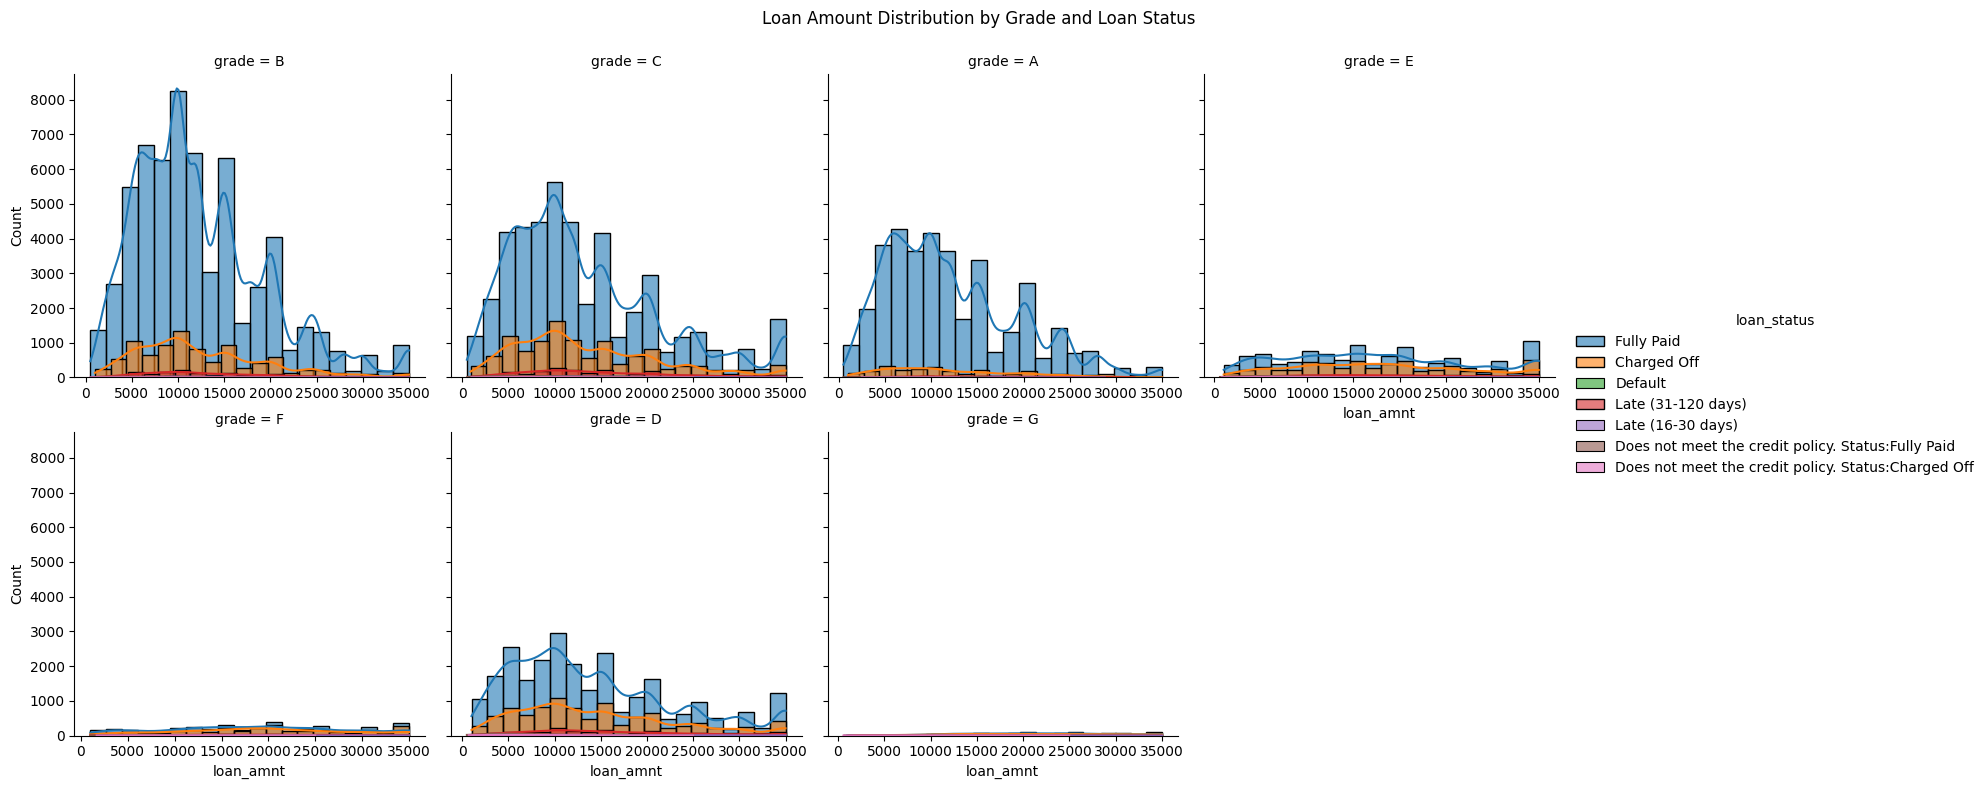

In [24]:
### Find relation between grade and loan status

g = sns.FacetGrid(df, col='grade', hue='loan_status', col_wrap=4, height=4, sharex=False)
g.map(sns.histplot, 'loan_amnt', bins=20, kde=True, alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Amount Distribution by Grade and Loan Status')
plt.show()

The graph shows that loan grade strongly controls default risk.Higher grades maintain good 
repayment even for larger loan amounts,while lower grades default regardless of loan size.
Hence grade is dominant predictor and current loans should be excluded due to unknown outcomes

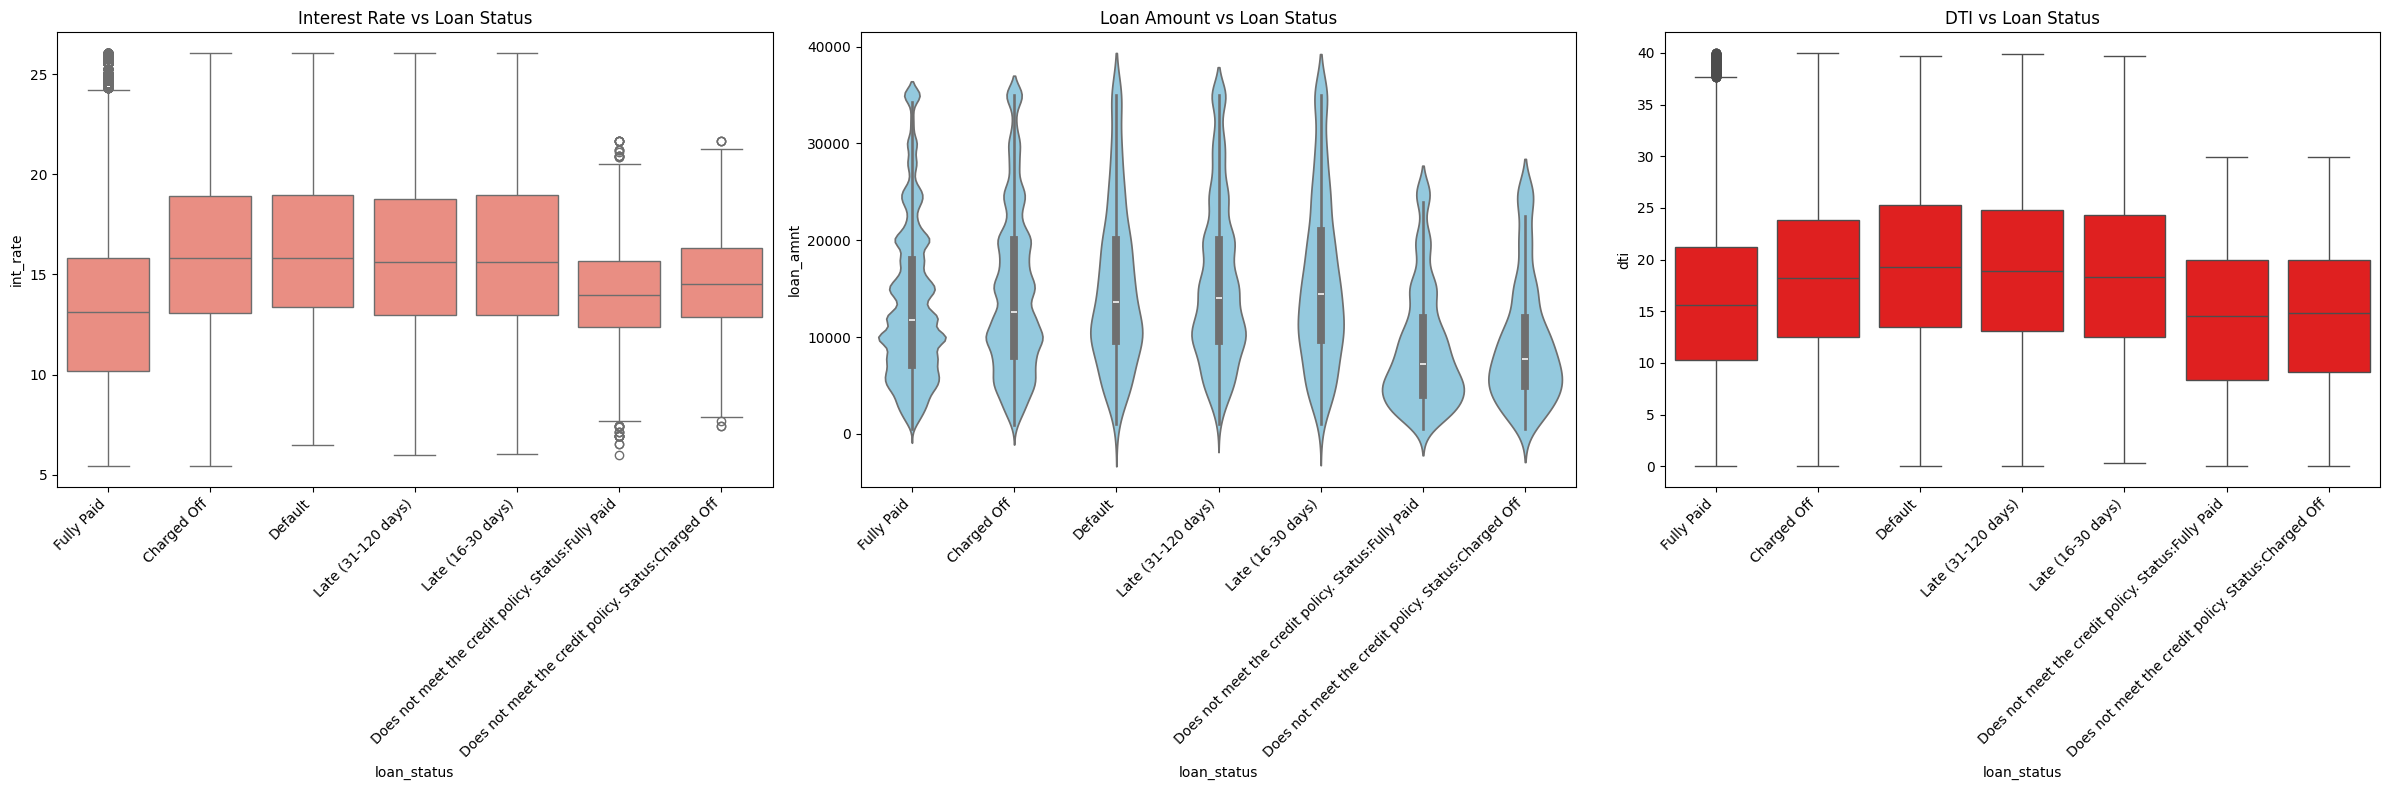

In [25]:
### Find relation of interest rate and loan amount with output columns

plt.figure(figsize=(24,8))


plt.subplot(1,3,1)
sns.boxplot(data=df, x='loan_status', y='int_rate',color='salmon')
plt.title('Interest Rate vs Loan Status')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,3,2)
sns.violinplot(data=df, x='loan_status', y='loan_amnt',color='skyblue')
plt.title('Loan Amount vs Loan Status')
plt.xticks(rotation=45,ha='right')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='loan_status', y='dti',color='red')
plt.title('DTI vs Loan Status')
plt.xticks(rotation=45,ha='right')


plt.tight_layout()
plt.show()

“The visualization shows that DTI and interest rate strongly separate good and bad loans, while loan amount alone has limited discriminative power. Riskier loan statuses consistently show higher DTI and interest rates, validating lender risk-based pricing and justifying their use as primary predictive features.”

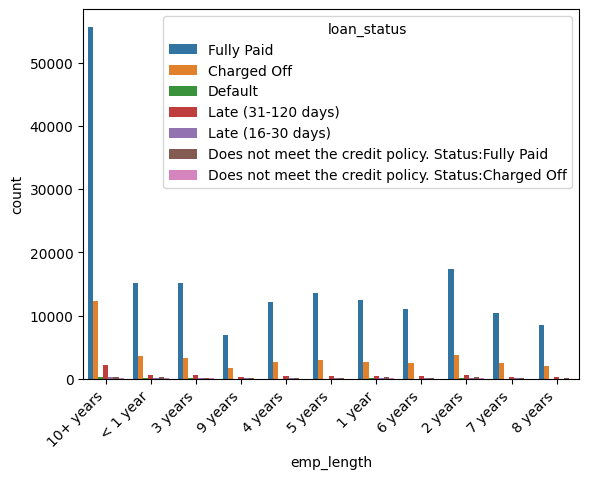

In [26]:
sns.countplot(data=df, x='emp_length', hue='loan_status')
plt.xticks(rotation=45,ha='right')
plt.show()

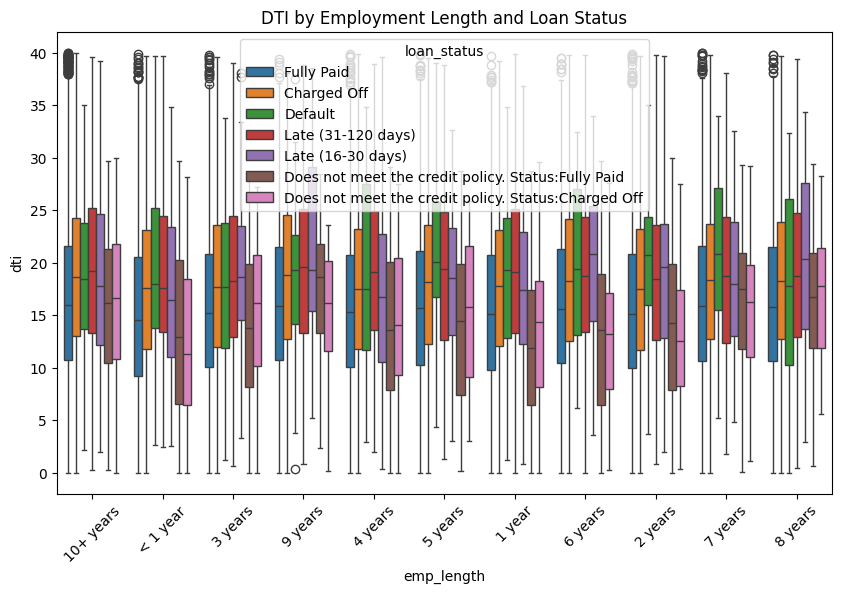

In [27]:
### Impact of DTI by employment on loan status

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='emp_length',
    y='dti',
    hue='loan_status'
)
plt.xticks(rotation=45)
plt.title('DTI by Employment Length and Loan Status')
plt.show()

“The DTI vs employment length boxplots reveal that while most borrowers fall within a regulated DTI band, higher DTI tails show increased default risk across all employment lengths. However, heavy overlap of distributions indicates that DTI or employment length alone cannot separate loan outcomes, justifying the use of non-linear, interaction-based models.”

## Features Engineering

In [28]:
df.head(5)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
5           5  1075269    1311441       5000         5000           5000.0   

         term  int_rate  installment grade sub_grade             emp_title  \
0   36 months     10.65       162.87     B        B2                   NaN   
1   60 months     15.27        59.83     C        C4                 Ryder   
2   36 months     15.96        84.33     C        C5                   NaN   
3   36 months     13.49       339.31     C        C1   AIR RESOURCES BOARD   
5   36 months      7.90       156.46     A        A4  Veolia Transportaton   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-11   
1   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2  10+ years           RENT     12252.0        Not Verified  Dec-11   
3  10+ years           RENT     49200.0     Source Verified  Dec-11   
5    3 years           RENT     36000.0     Source Verified  Dec-11   

   loan_status pymnt_plan                                                url  \
0   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
1  Charged Off          n  https://www.lendingclub.com/browse/loanDetail....   
2   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
3   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
5   Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   

          purpose                                  title zip_code addr_state  \
0     credit_card                               Computer    860xx         AZ   
1             car                                   bike    309xx         GA   
2  small_business                   real estate business    606xx         IL   
3           other                               personel    917xx         CA   
5         wedding  My wedding loan I promise to pay back    852xx         AZ   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65          0.0           Jan-85             1.0       3.0      0.0   
1   1.00          0.0           Apr-99             5.0       3.0      0.0   
2   8.72          0.0           Nov-01             2.0       2.0      0.0   
3  20.00          0.0           Feb-96             1.0      10.0      0.0   
5  11.20          0.0           Nov-04             3.0       9.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
5       7963        28.3       12.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5861.071414          5831.78          5000.00   
1            0.0   1008.710000          1008.71           456.46   
2            0.0   3003.653644          3003.65          2400.00   
3            0.0  12226.302210         12226.30         10000.00   
5            0.0   5631.377753          5631.38          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00  

In [29]:
df.shape

(238913, 53)

In [30]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [31]:
### Drop junk columns

df=df.drop(columns=['Unnamed: 0','id','member_id','sub_grade','url','zip_code','policy_code'])

In [32]:
df['title'].value_counts()

title
Debt consolidation                                                                  60384
Credit card refinancing                                                             19587
Debt Consolidation                                                                  11331
Home improvement                                                                     5367
Other                                                                                4932
Consolidation                                                                        3658
debt consolidation                                                                   3315
Debt Consolidation Loan                                                              3112
Major purchase                                                                       1724
Personal Loan                                                                        1676
Credit Card Consolidation                                                            1657
Busi

In [33]:
### Removed high cardinality features

df.drop(['emp_title','title'],axis=1,inplace=True)

In [34]:
df.sample(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
38735        4000         4000       537.115565   36 months      9.76   
120296       4000         4000      4000.000000   36 months     13.68   
439776      35000        35000     34950.000000   60 months     19.47   
218121       3000         3000      3000.000000   36 months     13.11   
303036      24000        24000     24000.000000   60 months     10.99   

        installment grade emp_length home_ownership  annual_inc  \
38735        128.62     B    6 years           RENT     30000.0   
120296       136.09     C    5 years           RENT     92700.0   
439776       917.00     D    5 years           RENT    105000.0   
218121       101.25     B    7 years           RENT     67000.0   
303036       521.70     B    3 years            OWN     76000.0   

       verification_status issue_d         loan_status pymnt_plan  \
38735         Not Verified  May-08          Fully Paid          n   
120296        Not Verified  Jul-13          Fully Paid          n   
439776     Source Verified  Feb-14             Default          n   
218121        Not Verified  May-12          Fully Paid          n   
303036            Verified  Oct-14  Late (31-120 days)          n   

                   purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
38735          credit_card         CA  17.04          0.0           Apr-05   
120296  debt_consolidation         CA  20.62          2.0           Nov-93   
439776  debt_consolidation         CA  25.88          2.0           Oct-00   
218121         credit_card         CA  20.26          0.0           Aug-01   
303036  debt_consolidation         CO  33.95          0.0           Apr-99   

        inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
38735              0.0       8.0      0.0       2489        32.3        9.0   
120296             1.0       6.0      0.0       4192        43.2       29.0   
439776             0.0      13.0      0.0      31568        62.1       34.0   
218121             1.0      14.0      0.0       9351        64.9       22.0   
303036             0.0      16.0      0.0      16979        79.7       45.0   

       initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
38735                    f       0.00           0.00   4630.160000   
120296                   f       0.00           0.00   4565.493467   
439776                   f   27769.30       27729.63  16506.000000   
218121                   f       0.00           0.00   3643.470953   
303036                   f   20189.03       20189.03   6260.400000   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
38735            551.11          3999.98         630.18                 0.0   
120296          4565.49          4000.00         565.49                 0.0   
439776         16482.42          7230.70        9275.30                 0.0   
218121          3643.47          3000.00         643.47                 0.0   
303036          6260.40          3810.97        2449.43                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
38735          0.0                      0.0       Jun-11           129.19   
120296         0.0                      0.0       Oct-14          2460.44   
439776         0.0                      0.0       Sep-15           917.00   
218121         0.0                      0.0       May-15           104.34   
303036         0.0                      0.0       Oct-15           521.70   

       last_credit_pull_d  collections_12_mths_ex_med application_type  \
38735              May-11                         0.0       INDIVIDUAL   
120296             Jan-16                         0.0       INDIVIDUAL   
439776             Jan-16                         0.0       INDIVIDUAL   
218121             Jan-16                         0.0       INDIVIDUAL   
303036             Jan-16                         0.0       INDIVIDUAL   

   

In [35]:
### Remove Data leakages features

df.drop([
    'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
    'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
    'recoveries','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'],axis=1,inplace=True
)  

In [36]:
### Create new date base features

df['issue_d'] = pd.to_datetime(
    df['issue_d'],
    format='%b-%y',
    errors='coerce'
)

df['earliest_cr_line'] = pd.to_datetime(
    df['earliest_cr_line'],
    format='%b-%y',
    errors='coerce'
)

df['credit_age_years'] = (
    (df['issue_d'] - df['earliest_cr_line']).dt.days / 365
)

In [37]:
### Making new features to see credit behaviour indicator

df['revol_util'] = df['revol_util'].replace('%', '', regex=True).astype(float)
df['high_revol_util'] = (df['revol_util'] > 75).astype(int)

In [38]:
### Remove special Charecter from emp length column

df['emp_length'] = df['emp_length'].str.replace(' years', '', regex=False)
df['emp_length'] = df['emp_length'].str.replace('< 1 year', '0')
df['emp_length'] = df['emp_length'].str.replace('10+ years', '10')
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

In [39]:
df.sample(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
25162       12000        12000      11770.59511   60 months     11.86   
178608       7000         7000       7000.00000   36 months     10.16   
381232      32000        32000      32000.00000   36 months     14.99   
447438       7000         7000       7000.00000   36 months     16.24   
78856       17325        17325      17325.00000   60 months     23.10   

        installment grade  emp_length home_ownership  annual_inc  \
25162        266.09     B         5.0       MORTGAGE    100000.0   
178608       226.40     B         NaN       MORTGAGE     45000.0   
381232      1109.14     C         6.0       MORTGAGE    576000.0   
447438       246.93     C         2.0           RENT     35000.0   
78856        489.40     E         NaN       MORTGAGE     40000.0   

       verification_status    issue_d         loan_status pymnt_plan  \
25162         Not Verified 2010-10-01          Fully Paid          n   
178608            Verified 2012-12-01          Fully Paid          n   
381232            Verified 2014-05-01          Fully Paid          n   
447438     Source Verified 2014-02-01  Late (31-120 days)          n   
78856      Source Verified 2013-10-01         Charged Off          n   

                   purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
25162                  car         NY   0.86          1.0       2002-02-01   
178608    home_improvement         FL  32.59          0.0       1985-05-01   
381232    home_improvement         TX   6.07          0.0       1986-03-01   
447438  debt_consolidation         NY  16.19          0.0       2007-03-01   
78856   debt_consolidation         TX  26.37          0.0       1999-12-01   

        inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
25162              2.0       8.0      0.0       3589        14.8       14.0   
178608             0.0      16.0      0.0      28034        58.6       26.0   
381232             2.0      23.0      1.0      11357        36.8       41.0   
447438             1.0       6.0      0.0       5640        79.4       12.0   
78856              1.0       9.0      0.0      13175        61.0       12.0   

       initial_list_status last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
25162                    f       Jan-15          2600.26             Feb-15   
178608                   f       Dec-15           226.25             Dec-15   
381232                   f       Apr-15         25745.51             Jan-16   
447438                   f       Nov-15           246.93             Jan-16   
78856                    f       Oct-14           489.40             Mar-15   

        collections_12_mths_ex_med application_type  acc_now_delinq  \
25162                          0.0       INDIVIDUAL             0.0   
178608                         0.0       INDIVIDUAL             0.0   
381232                         0.0       INDIVIDUAL             0.0   
447438                         0.0       INDIVIDUAL             0.0   
78856                          0.0       INDIVIDUAL             0.0   

        credit_age_years  high_revol_util  
25162           8.668493                0  
178608         27.605479                0  
381232         28.186301                0  
447438          6.928767                1  
78856          13.843836                0

In [40]:
### delte the original columns after making new features

df.drop([
    'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','revol_util'],axis=1,inplace=True
       )    

In [41]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [42]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [43]:
### Map target columns between (0)legit,(1)fraud
### (0)- fully paid,Does not meet the credit policy. Status:Fully Paid
### (1)- Charged Off,Late (31-120 days)',In Grace Period,Late (16-30 days),Default,Does not meet the credit policy. Status:Charged Off

df['loan_status']=df['loan_status'].map({
    'Fully Paid':0,
    'Does not meet the credit policy. Status:Fully Paid':0,
    'Charged Off':1,
    'Late (31-120 days)':1,
    'Late (16-30 days)':1,
    'Default':1,
    'Does not meet the credit policy. Status:Charged Off':1}
                                       )
    

In [44]:
### Split the columns into x,y for training 

x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [45]:
x.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    96615
home_ownership                    0
annual_inc                        4
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
total_acc                        29
initial_list_status               0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
application_type                  0
acc_now_delinq                   29
credit_age_years                 29
high_revol_util             

In [46]:
df['emp_length'].value_counts()

emp_length
2.0    22352
0.0    19998
3.0    19395
5.0    17297
4.0    15402
6.0    14300
7.0    13466
8.0    11092
9.0     8996
Name: count, dtype: int64

In [47]:
df['emp_length'].dtype

dtype('float64')

In [48]:
### Fill null values with 
### mode for emp_legth cause low cardinality features
### median for other numerical columns

x['emp_length']=x['emp_length'].fillna(x['emp_length'].mode()[0])

for col in x.select_dtypes(include=np.number).columns:
    if x[col].isnull().any():
        x[col] = x[col].fillna(x[col].median())
    

In [49]:
x.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
credit_age_years              0
high_revol_util               0
dtype: int64

In [50]:
x.sample(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
82549       12000        12000          12000.0   60 months     20.20   
10637       12000        12000          12000.0   36 months      5.99   
210205      17200        17200          17200.0   60 months     19.05   
20869        5500         5500           5500.0   36 months     17.14   
232803       6000         6000           6000.0   36 months      8.19   

        installment grade  emp_length home_ownership  annual_inc  \
82549        319.27     D         3.0       MORTGAGE     58000.0   
10637        365.01     A         7.0       MORTGAGE     85000.0   
210205       446.66     D         2.0       MORTGAGE     75000.0   
20869        196.48     E         5.0           RENT     36000.0   
232803       188.55     A         2.0           RENT     38000.0   

       verification_status pymnt_plan             purpose addr_state    dti  \
82549             Verified          n  debt_consolidation         MI  12.66   
10637             Verified          n               other         FL  10.77   
210205            Verified          n  debt_consolidation         AL  18.15   
20869      Source Verified          n  debt_consolidation         CA   9.77   
232803        Not Verified          n  debt_consolidation         NY  26.15   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
82549           0.0             2.0       8.0      0.0      18633       22.0   
10637           0.0             3.0      14.0      0.0       4504       21.0   
210205          0.0             0.0      12.0      0.0      23915       25.0   
20869           0.0             2.0       8.0      0.0       5301       11.0   
232803          0.0             0.0      21.0      0.0       2160       39.0   

       initial_list_status  last_pymnt_amnt  collections_12_mths_ex_med  \
82549                    f          9233.10                         0.0   
10637                    f           368.20                         0.0   
210205                   f         16569.34                         0.0   
20869                    f           208.39                         0.0   
232803                   f          4510.37                         0.0   

       application_type  acc_now_delinq  credit_age_years  high_revol_util  
82549        INDIVIDUAL             0.0         12.923288                0  
10637        INDIVIDUAL             0.0         23.682192                0  
210205       INDIVIDUAL             0.0         12.758904                0  
20869        INDIVIDUAL             0.0          7.172603                1  
232803       INDIVIDUAL             0.0         13.090411                0

In [51]:
### encode the categorical columns

label=LabelEncoder()
for col in x.select_dtypes(include='object').columns:
    x[col]=label.fit_transform(x[col])
    

In [52]:
### Split data into x_train,y_train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [53]:
### Print train test split deistribution

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (191130, 28)
x_test shape: (47783, 28)
y_train shape: (191130,)
y_test shape: (47783,)


In [54]:
### see target columns distribution 

y_train.value_counts()

loan_status
0    149381
1     41749
Name: count, dtype: int64

In [55]:
### Scale the model for non-tree based algorithms

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [56]:
x_train

array([[-0.86574492, -0.86276398, -0.85473428, ..., -0.04872334,
         0.87155923, -0.56585024],
       [-0.06075452, -0.05537814, -0.03896071, ..., -0.04872334,
        -0.53162576, -0.56585024],
       [ 0.55846887,  0.56568788,  0.54814906, ..., -0.04872334,
         0.03218958,  1.76725205],
       ...,
       [ 2.20560307,  2.21772352,  2.21677682, ..., -0.04872334,
         0.5404584 ,  1.76725205],
       [-0.39513515, -0.3907538 , -0.37268626, ..., -0.04872334,
        -0.32105725, -0.56585024],
       [-0.92766726, -0.92487058, -0.9041751 , ..., -0.04872334,
        -0.16639831, -0.56585024]], shape=(191130, 28))

In [57]:
x_test

array([[-0.67997791, -0.67644417, -0.66006104, ..., -0.04872334,
        -1.33868404, -0.56585024],
       [-0.80382258, -0.80065738, -0.78057305, ..., -0.04872334,
         0.40794546, -0.56585024],
       [-1.00197407, -0.99939851, -0.97833634, ..., -0.04872334,
         0.69511734, -0.56585024],
       ...,
       [-0.78214976, -0.77892007, -0.75894269, ..., -0.04872334,
        -0.7313028 , -0.56585024],
       [ 0.31077951,  0.31726147, -1.25644096, ..., -0.04872334,
        -1.06131448,  1.76725205],
       [-0.41990408, -0.41559644, -0.39740667, ..., -0.04872334,
        -8.69732739, -0.56585024]], shape=(47783, 28))

## Train The Model With Tree And Non-tree based Algorithms

In [58]:
models={
    'LogisticRegression':LogisticRegression(
        random_state=42,class_weight='balanced'
    ),
    'DecisionTreeClassifier':DecisionTreeClassifier(
        class_weight='balanced'
    ),
    'RandomForestClassifier':RandomForestClassifier(
        class_weight='balanced'
    ),
    'KNeighborsClassifier':KNeighborsClassifier(
        weights='distance'
    ),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    
    'XGBClassifier':XGBClassifier(
        scale_pos_weight=149381/41749
    ),
    'LightBGM':lgb.LGBMClassifier(
        scale_pos_weight=149381/41749
    )
}

for name,model in models.items():
    model.fit(x_train,y_train)

    print(f'\========={name}==========')

    y_pred=model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy : {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall   : {rec:.4f}')
    print(f'F1 Score : {f1:.4f}')

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))

\=========LogisticRegression==========
Accuracy : 0.8495
Precision: 0.5977
Recall   : 0.9504
F1 Score : 0.7339

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     37346
           1       0.60      0.95      0.73     10437

    accuracy                           0.85     47783
   macro avg       0.79      0.89      0.81     47783
weighted avg       0.90      0.85      0.86     47783

Confusion Matrix
[[30671  6675]
 [  518  9919]]
\=========DecisionTreeClassifier==========
Accuracy : 0.8917
Precision: 0.7592
Recall   : 0.7386
F1 Score : 0.7488

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     37346
           1       0.76      0.74      0.75     10437

    accuracy                           0.89     47783
   macro avg       0.84      0.84      0.84     47783
weighted avg       0.89      0.89      0.89     47783

Confusion Matrix
[[34901  

All models were evaluated on imbalanced data with focus on recall and F1-score. XGBoost achieved the best overall balance, with the highest F1-score (0.79) and very high recall (0.94), making it the strongest model overall. LightGBM achieved the highest recall (0.96), making it ideal when minimizing missed defaulters is the top priority, while Random Forest and Decision Tree showed stable but comparatively lower recall.

## Tune Model For Better Performance With Predict_Probability

In [59]:
models={
    'RandomForestClassifier':RandomForestClassifier(
        class_weight='balanced'
    ),
    'XGBClassifier':XGBClassifier(
        scale_pos_weight=149381/41749
    ),
    'LightBGM':lgb.LGBMClassifier(
        scale_pos_weight=149381/41749
    )
    
}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict_proba(x_test)[:,1]
    y_proba=(y_pred > 0.25).astype(int)  
    

    print(f'\========={name}==========')

    y_pred=model.predict(x_test)

    acc = accuracy_score(y_test, y_proba)
    prec = precision_score(y_test, y_proba)
    rec = recall_score(y_test, y_proba)
    f1 = f1_score(y_test, y_proba)

    print(f'Accuracy : {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall   : {rec:.4f}')
    print(f'F1 Score : {f1:.4f}')

    print('\nClassification Report')
    print(classification_report(y_test, y_proba))

    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_proba))

\=========RandomForestClassifier==========
Accuracy : 0.8780
Precision: 0.6529
Recall   : 0.9428
F1 Score : 0.7715

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     37346
           1       0.65      0.94      0.77     10437

    accuracy                           0.88     47783
   macro avg       0.82      0.90      0.84     47783
weighted avg       0.91      0.88      0.89     47783

Confusion Matrix
[[32115  5231]
 [  597  9840]]
\=========XGBClassifier==========
Accuracy : 0.8530
Precision: 0.5997
Recall   : 0.9829
F1 Score : 0.7449

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     37346
           1       0.60      0.98      0.74     10437

    accuracy                           0.85     47783
   macro avg       0.80      0.90      0.82     47783
weighted avg       0.91      0.85      0.86     47783

Confusion Matrix
[[30498  6848]

“XGBoost was selected as the final model as it achieved the best F1-score while maintaining very high recall, providing an optimal balance between minimizing loan defaults and controlling false rejections.”

## Final Model XGBoost

In [60]:
xgb=XGBClassifier(scale_pos_weight=149381/41749)

xgb.fit(x_train,y_train)
y_pred=xgb.predict_proba(x_test)[:,1]
y_proba=(y_pred >0.25).astype(int)

print('\nClassification Report')
print(classification_report(y_test, y_proba))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_proba))


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     37346
           1       0.60      0.98      0.74     10437

    accuracy                           0.85     47783
   macro avg       0.80      0.90      0.82     47783
weighted avg       0.91      0.85      0.86     47783

Confusion Matrix
[[30498  6848]
 [  178 10259]]


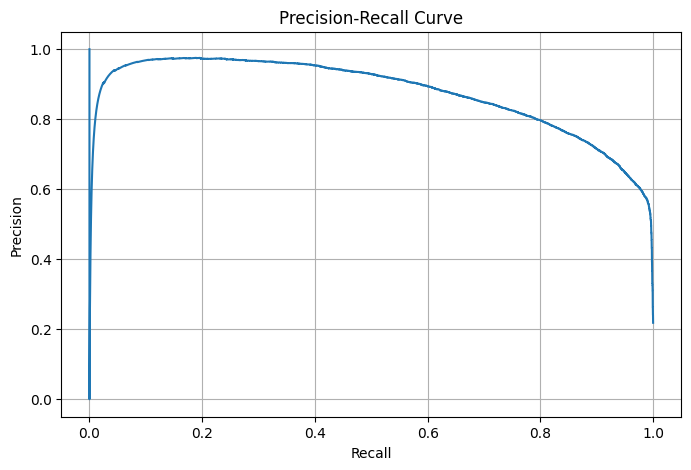

In [61]:
### plotting precision recall curve to see trade-off

y_prob = model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


“This precision–recall curve shows model maintains high precision across a wide recall range, meaning it reliably identifies risky loans while controlling false positives.”

In [62]:
### print training data to test model output

x_train[56]

array([-0.1845992 , -0.17959135, -0.16256276, -0.52959827,  0.39547345,
        0.00923011,  0.88957223, -0.56663286, -1.00820565, -0.40744099,
       -1.20796954, -0.00560297, -0.70555914,  0.32798463, -0.20213024,
       -0.33785505,  0.07859846,  0.85543855, -0.31966431, -0.21550111,
       -0.32595256, -0.5872791 , -0.76476677, -0.07065791,  0.        ,
       -0.04872334, -0.65324723,  1.76725205])

In [63]:
## Print Model Output

input_text=(-0.1845992 , -0.17959135, -0.16256276, -0.52959827,  0.39547345,
        0.00923011,  0.88957223, -0.56663286, -1.00820565, -0.40744099,
       -1.20796954, -0.00560297, -0.70555914,  0.32798463, -0.20213024,
       -0.33785505,  0.07859846,  0.85543855, -0.31966431, -0.21550111,
       -0.32595256, -0.5872791 , -0.76476677, -0.07065791,  0.        ,
       -0.04872334, -0.65324723,  1.76725205)


np_df = np.asarray(input_text).reshape(1, -1)

prob = xgb.predict_proba(np_df)[:, 1]


threshold = 0.25
pred = (prob > threshold).astype(int)


if pred[0] == 1:
    print('Default')        
else:
    print('Fully Paid')     


Default
